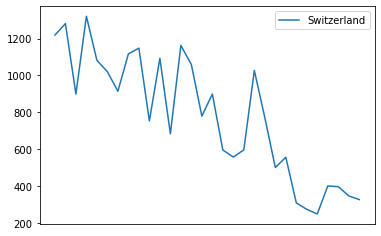

In [1]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import requests
import json


def parse_corona_timeseries(country):
    response = requests.get('https://pomber.github.io/covid19/timeseries.json')

    countries = json.loads(response.content)

    return countries[country]

def plot_country(country):
    timeseries = parse_corona_timeseries(country)

    course = []
    dates = []

    for i in range(len(timeseries) - 30, len(timeseries)):
        course.append(int(timeseries[i]['confirmed']) - int(timeseries[i - 1]['confirmed']))
        dates.append(timeseries[i]['date'])
        pass

    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))

    plt.plot(dates, course, label=country)
    pass

#print(len(timeseries))
#plot_country('US')
#plot_country('Germany')
#plot_country('Italy')
#plot_country('France')
plot_country('Switzerland')

#plt.axis([0, len(timeseries) - 30, 0, 1200])
plt.legend()
plt.show()